,Configuration,Train Loss,Val RMSE,Val NMSE (dB),Train Time (s)
0,Random Init,0.0012,0.0339,-21.8,4118.97
1,Pre-trained (Frozen),0.0038,0.0533,-18.4,3747.72
2,Pre-trained (Fine-tune),0.0016,0.0361,-21.5,4206.82


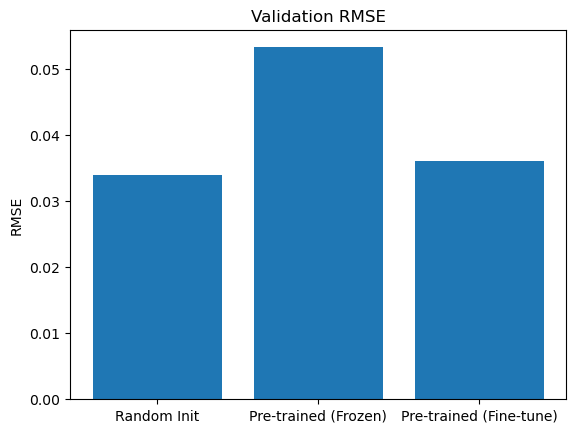

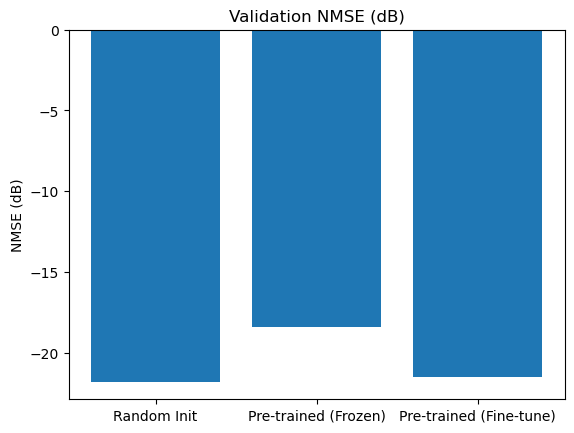

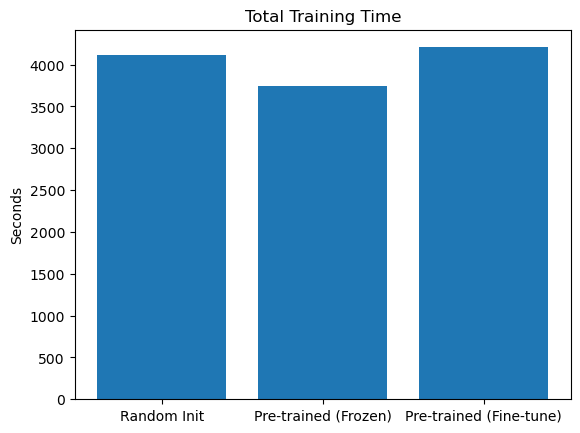

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display   # Jupyter에서 표 보기 용도

# … (실험 결과 숫자 그대로)
df = pd.DataFrame({
    'Configuration': ['Random Init', 'Pre-trained (Frozen)', 'Pre-trained (Fine-tune)'],
    'Train Loss':    [0.0012, 0.0038, 0.0016],
    'Val RMSE':      [0.0339, 0.0533, 0.0361],
    'Val NMSE (dB)': [-21.8,  -18.4,  -21.5],
    'Train Time (s)':[4118.97, 3747.72, 4206.82]
})

display(df)          # 혹은 print(df)

# --- 그래프 ---
plt.figure()
plt.bar(df['Configuration'], df['Val RMSE'])
plt.ylabel('RMSE'); plt.title('Validation RMSE')
plt.show()

plt.figure()
plt.bar(df['Configuration'], df['Val NMSE (dB)'])
plt.ylabel('NMSE (dB)'); plt.title('Validation NMSE (dB)')
plt.show()

plt.figure()
plt.bar(df['Configuration'], df['Train Time (s)'])
plt.ylabel('Seconds'); plt.title('Total Training Time')
plt.show()


,Configuration,Train Loss,Val RMSE,Val NMSE,Val NMSE (dB),Training Time (s)
0,GRU,0.0011,0.0303,0.003690,-24.3,374.10
1,Transformer,0.0010,0.0295,0.003521,-24.5,775.85
2,SeqRNN,0.0012,0.0330,0.004387,-23.6,260.23
3,SeqLSTM,0.0012,0.0335,0.004515,-23.5,276.71
4,Parallel Transformer,0.0010,0.0305,0.003767,-24.2,705.98


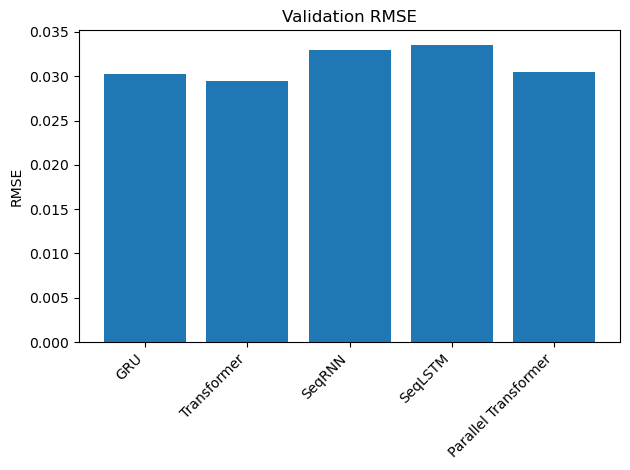

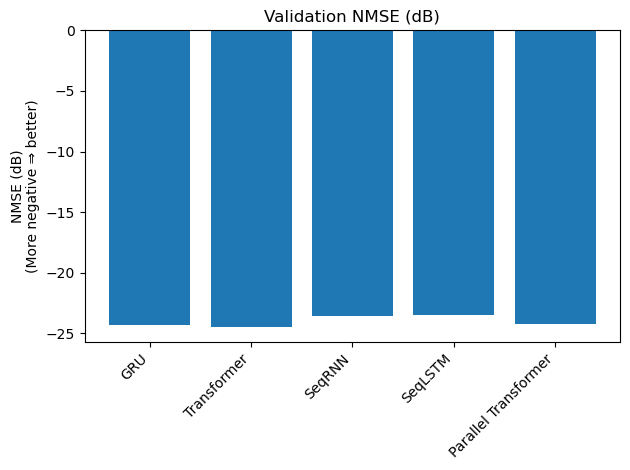

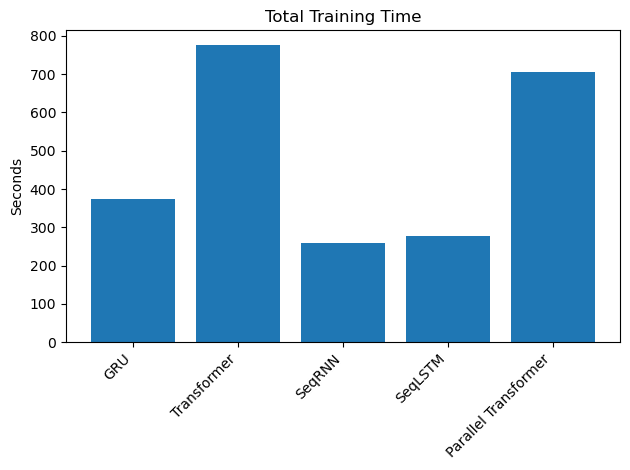

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# -----------------------
# 신규 5개 실험 결과 정리
# -----------------------
configs = ['GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer']
train_loss = [0.0011, 0.0010, 0.0012, 0.0012, 0.0010]
val_rmse   = [0.0303, 0.0295, 0.0330, 0.0335, 0.0305]
val_nmse   = [3.6902e-03, 3.5208e-03, 4.3872e-03, 4.5145e-03, 3.7671e-03]
val_nmse_db = [-24.3, -24.5, -23.6, -23.5, -24.2]
train_time = [374.10, 775.85, 260.23, 276.71, 705.98]

df = pd.DataFrame({
    'Configuration': configs,
    'Train Loss': train_loss,
    'Val RMSE': val_rmse,
    'Val NMSE': val_nmse,
    'Val NMSE (dB)': val_nmse_db,
    'Training Time (s)': train_time
})

display(df)

# ---------- 그래프 1: Validation RMSE ----------
plt.figure()
plt.bar(df['Configuration'], df['Val RMSE'])
plt.ylabel('RMSE')
plt.title('Validation RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------- 그래프 2: Validation NMSE (dB) ----------
plt.figure()
plt.bar(df['Configuration'], df['Val NMSE (dB)'])
plt.ylabel('NMSE (dB)\n(More negative ⇒ better)')
plt.title('Validation NMSE (dB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------- 그래프 3: Training Time ----------
plt.figure()
plt.bar(df['Configuration'], df['Training Time (s)'])
plt.ylabel('Seconds')
plt.title('Total Training Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


,Configuration,Val RMSE,Val NMSE (dB),Training Time (s)
0,GRU,0.0303,-24.3,374.10
1,Transformer,0.0295,-24.5,775.85
2,SeqRNN,0.0330,-23.6,260.23
3,SeqLSTM,0.0335,-23.5,276.71
4,Parallel Transformer,0.0305,-24.2,705.98
5,LWM (Rand Init),0.0339,-21.8,4118.97
6,LWM (Fine-tune),0.0361,-21.5,4206.82


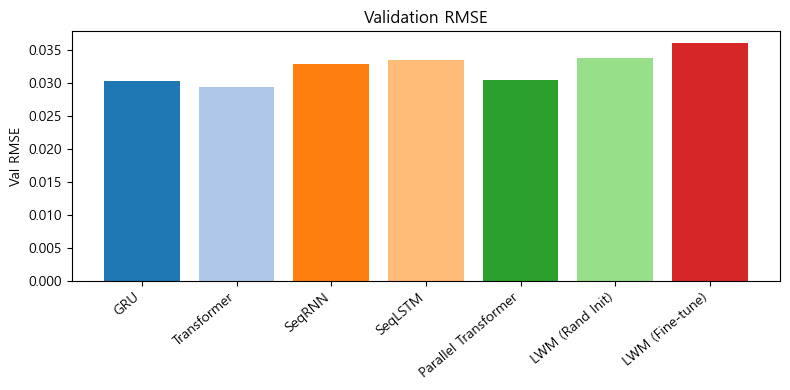

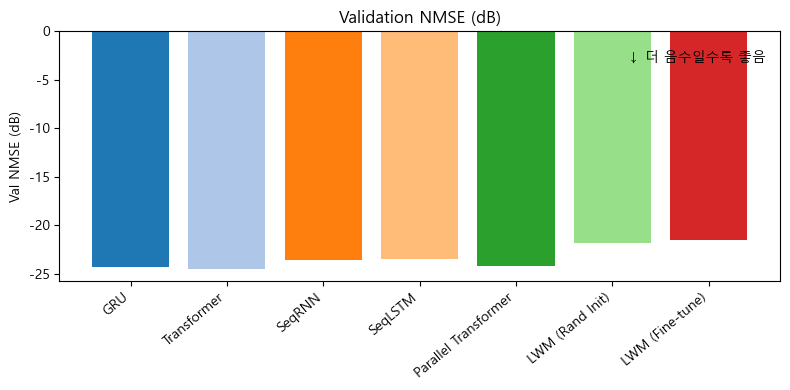

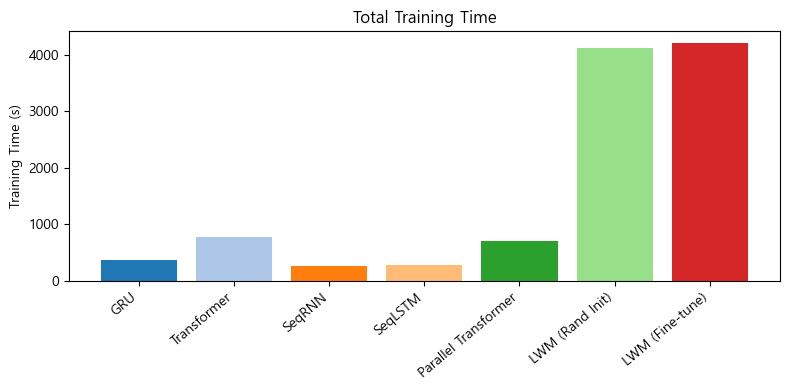

In [5]:
# ------------------------------------------
# 0) 공통 import
# ------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt

# ① 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 기본 한글 폰트
# ② 마이너스 기호 깨짐 방지(필수 아님)
plt.rcParams['axes.unicode_minus'] = False

# ------------------------------------------
# 1) “기존 5 개 모델” 결과
#    (값만 바꾸면 그대로 재활용 가능)
# ------------------------------------------
df_other = pd.DataFrame({
    'Configuration': ['GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer'],
    'Val RMSE':      [0.0303, 0.0295, 0.0330, 0.0335, 0.0305],
    'Val NMSE (dB)': [-24.3,  -24.5,  -23.6,  -23.5,  -24.2],
    'Training Time (s)': [374.10, 775.85, 260.23, 276.71, 705.98]
})

# ------------------------------------------
# 2) LWM 실험 결과 ★여기만 편집해서 추가★
#    ─ 예시: ① 랜덤 초기화, ② Pre-train+미세조정
# ------------------------------------------
df_lwm = pd.DataFrame([
    dict(Configuration='LWM (Rand Init)',
         Val_RMSE=0.0339,
         Val_NMSE_dB=-21.8,
         Training_Time_s=4118.97),

    dict(Configuration='LWM (Fine-tune)',
         Val_RMSE=0.0361,
         Val_NMSE_dB=-21.5,
         Training_Time_s=4206.82)
])

# 컬럼 이름을 기존과 맞춰주기
df_lwm = df_lwm.rename(columns={
    'Val_RMSE':'Val RMSE',
    'Val_NMSE_dB':'Val NMSE (dB)',
    'Training_Time_s':'Training Time (s)'
})

# ------------------------------------------
# 3) 통합 & 정렬 (원하는 순서로 정렬 가능)
# ------------------------------------------
df_all = pd.concat([df_other, df_lwm], ignore_index=True)

# 원하는 정렬 예시 (RMSE 오름차순)
# df_all = df_all.sort_values('Val RMSE')

display(df_all)

# ------------------------------------------
# 4) 막대그래프 그리기
# ------------------------------------------
metrics = {
    'Val RMSE'       : 'Validation RMSE',
    'Val NMSE (dB)'  : 'Validation NMSE (dB)',
    'Training Time (s)': 'Total Training Time'
}

palette = plt.cm.tab20.colors          # 최대 20가지 색

for idx, (col, title) in enumerate(metrics.items(), 1):
    plt.figure(figsize=(8, 4))
    plt.bar(df_all['Configuration'], df_all[col],
            color=palette[:len(df_all)])
    plt.title(title)
    plt.ylabel(col)
    plt.xticks(rotation=40, ha='right')
    # NMSE(dB)가 “더 음수”가 좋다는 안내 추가
    if 'NMSE' in col:
        plt.annotate('↓ 더 음수일수록 좋음',
                     xy=(0.98, 0.92), xycoords='axes fraction',
                     ha='right', va='top', fontsize=10)
    plt.tight_layout()
    plt.show()


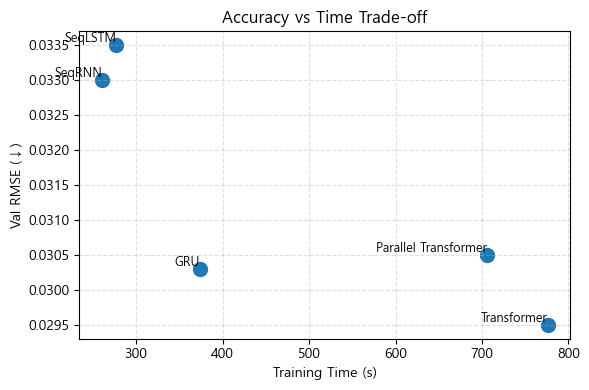

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['Training Time (s)'], df['Val RMSE'], s=100)

for x, y, name in zip(df['Training Time (s)'], df['Val RMSE'], df['Configuration']):
    plt.text(x, y, name, fontsize=9, va='bottom', ha='right')  # 모델명 주석

plt.xlabel('Training Time (s)')
plt.ylabel('Val RMSE (↓)')
plt.title('Accuracy vs Time Trade-off')
plt.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()


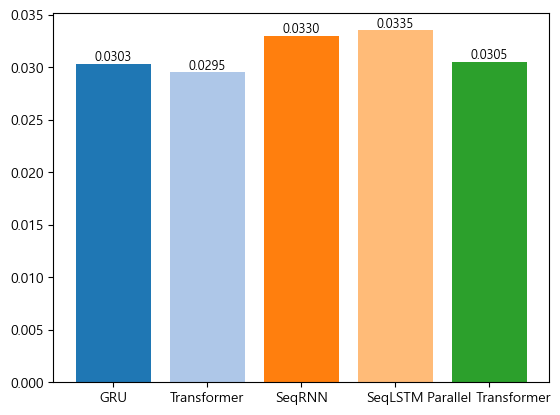

In [7]:
# 막대 위에 숫자 라벨 붙이는 예시
bars = plt.bar(df['Configuration'], df['Val RMSE'], color=palette)
for bar, val in zip(bars, df['Val RMSE']):
    plt.text(bar.get_x() + bar.get_width()/2, val,
             f'{val:.4f}', ha='center', va='bottom', fontsize=9)


,Configuration,Val RMSE,Val NMSE (dB),Training Time (s)
0,GRU,0.0303,-24.3,374.10
1,Transformer,0.0295,-24.5,775.85
2,SeqRNN,0.0330,-23.6,260.23
3,SeqLSTM,0.0335,-23.5,276.71
4,Parallel Transformer,0.0305,-24.2,705.98
5,LWM (Rand Init),0.0339,-21.8,4118.97
6,LWM (Frozen),0.0533,-18.4,3747.72
7,LWM (FrozenX),0.0361,-21.5,4206.82


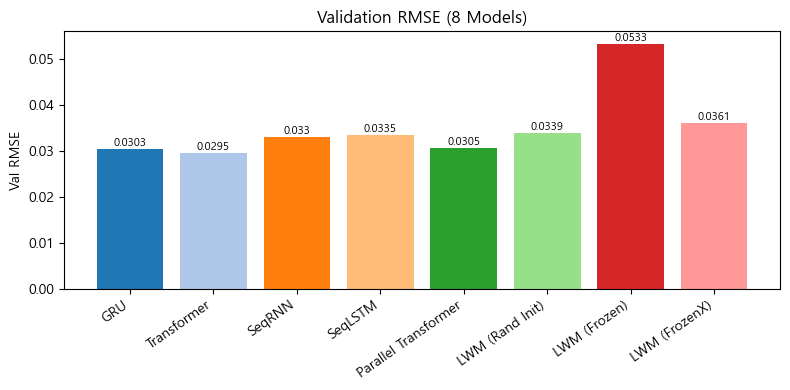

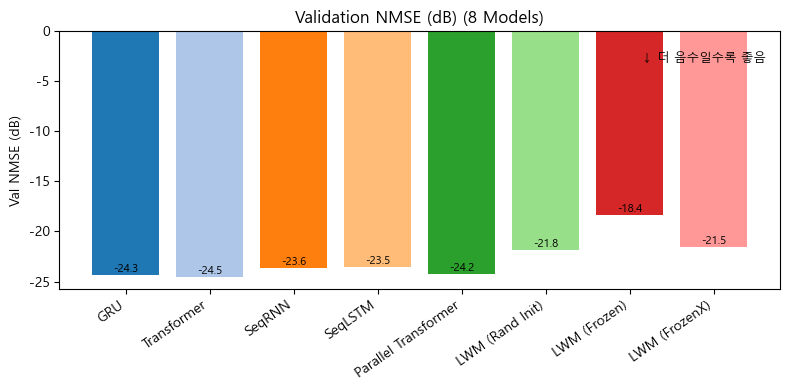

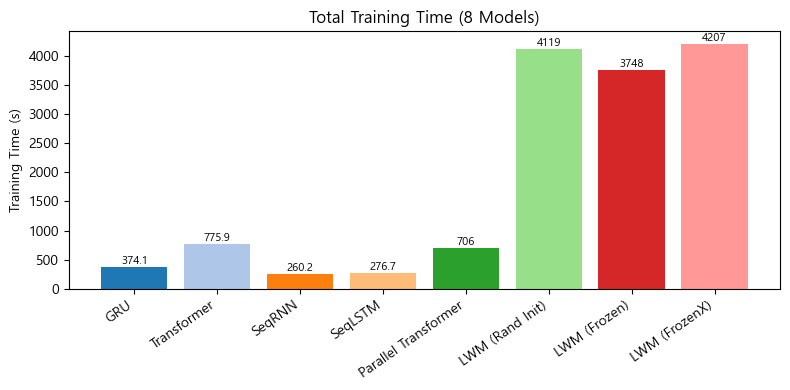

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ---------------------------------------------------------
# 1) 기존 시퀀스 모델 5종 결과
# ---------------------------------------------------------
df_other = pd.DataFrame({
    'Configuration': ['GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer'],
    'Val RMSE':      [0.0303, 0.0295, 0.0330, 0.0335, 0.0305],
    'Val NMSE (dB)': [-24.3,  -24.5,  -23.6,  -23.5,  -24.2],
    'Training Time (s)': [374.10, 775.85, 260.23, 276.71, 705.98]
})

# ---------------------------------------------------------
# 2) LWM 실험 3종 결과  (필요 시 숫자만 수정하면 됨)
# ---------------------------------------------------------
df_lwm = pd.DataFrame({
    'Configuration': ['LWM (Rand Init)', 'LWM (Frozen)', 'LWM (FrozenX)'],
    'Val RMSE':      [0.0339, 0.0533, 0.0361],
    'Val NMSE (dB)': [-21.8,  -18.4,  -21.5],
    'Training Time (s)':[4118.97, 3747.72, 4206.82]
})

# ---------------------------------------------------------
# 3) 통합
# ---------------------------------------------------------
df_all = pd.concat([df_other, df_lwm], ignore_index=True)

display(df_all)

# ---------------------------------------------------------
# 4) 시각화 함수
# ---------------------------------------------------------
def plot_metric(df, metric, title):
    colors = plt.cm.tab20.colors  # 서로 다른 색
    plt.figure(figsize=(8,4))
    bars = plt.bar(df['Configuration'], df[metric], color=colors[:len(df)])
    
    # 막대 위에 값 라벨
    for bar, val in zip(bars, df[metric]):
        plt.text(bar.get_x() + bar.get_width()/2, val,
                 f'{val:.4g}', ha='center', va='bottom', fontsize=8)
    
    plt.title(title)
    plt.ylabel(metric)
    plt.xticks(rotation=35, ha='right')
    if 'NMSE' in metric:
        plt.annotate('↓ 더 음수일수록 좋음',
                     xy=(0.98, 0.92), xycoords='axes fraction',
                     ha='right', va='top', fontsize=9)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 5) 그래프 3종 출력
# ---------------------------------------------------------
for col, title in [
    ('Val RMSE', 'Validation RMSE (8 Models)'),
    ('Val NMSE (dB)', 'Validation NMSE (dB) (8 Models)'),
    ('Training Time (s)', 'Total Training Time (8 Models)')]:
    plot_metric(df_all, col, title)


,Configuration,Val RMSE,Val NMSE (dB),Training Time (s)
0,GRU,0.0303,-24.3,374.10
1,Transformer,0.0295,-24.5,775.85
2,SeqRNN,0.0330,-23.6,260.23
3,SeqLSTM,0.0335,-23.5,276.71
4,Parallel Transformer,0.0305,-24.2,705.98
5,LWM (Rand Init),0.0339,-21.8,4118.97
6,LWM (Frozen),0.0533,-18.4,3747.72
7,LWM (Fine‑tune),0.0361,-21.5,4206.82


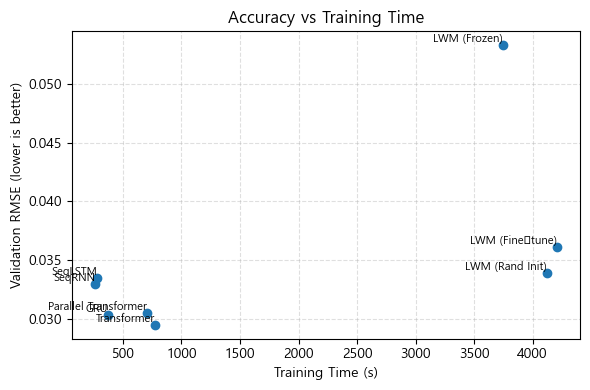

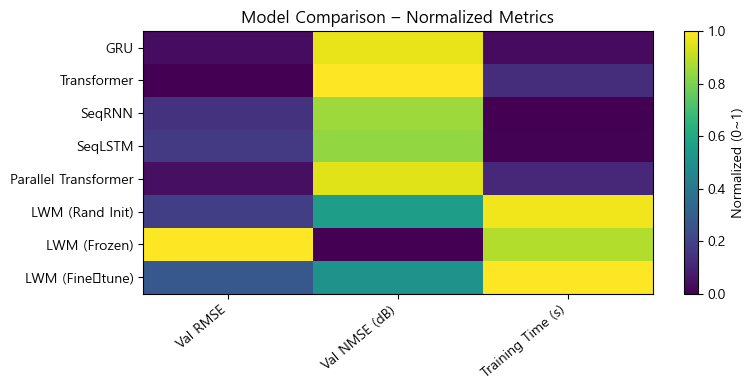

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='Glyph.*Malgun Gothic')


# ─────────────────────────────────────────────
# 0) 데이터프레임 (앞 셀을 실행하지 않은 경우 대비해 재정의)
# ─────────────────────────────────────────────
df_all = pd.DataFrame({
    'Configuration': ['GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer',
                      'LWM (Rand Init)', 'LWM (Frozen)', 'LWM (Fine‑tune)'],
    'Val RMSE':      [0.0303, 0.0295, 0.0330, 0.0335, 0.0305,
                      0.0339, 0.0533, 0.0361],
    'Val NMSE (dB)': [-24.3,  -24.5,  -23.6,  -23.5,  -24.2,
                      -21.8,  -18.4,  -21.5],
    'Training Time (s)':[374.10, 775.85, 260.23, 276.71, 705.98,
                         4118.97, 3747.72, 4206.82]
})

display(df_all)

# ─────────────────────────────────────────────
# 1) Scatter plot  (Time vs RMSE)
# ─────────────────────────────────────────────
plt.figure(figsize=(6,4))
plt.scatter(df_all['Training Time (s)'], df_all['Val RMSE'])
for x, y, label in zip(df_all['Training Time (s)'], df_all['Val RMSE'], df_all['Configuration']):
    plt.text(x, y, label, fontsize=8, va='bottom', ha='right')
plt.xlabel('Training Time (s)')
plt.ylabel('Validation RMSE (lower is better)')
plt.title('Accuracy vs Training Time')
plt.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────
# 2) Heat‑map of normalised metrics
#     – each metric scaled 0‑1 for comparability
# ─────────────────────────────────────────────
metrics = ['Val RMSE', 'Val NMSE (dB)', 'Training Time (s)']
data_norm = df_all[metrics].copy()

# Val NMSE (dB) : 더 음수가 좋음 → 부호 뒤집어서 "높을수록 좋음"으로 변환
data_norm['Val NMSE (dB)'] = -data_norm['Val NMSE (dB)']

# Min‑max normalize 각 열
data_norm = (data_norm - data_norm.min()) / (data_norm.max() - data_norm.min())

plt.figure(figsize=(8,4))
plt.imshow(data_norm, aspect='auto')
plt.colorbar(label='Normalized (0~1)')
plt.xticks(range(len(metrics)), metrics, rotation=40, ha='right')
plt.yticks(range(len(df_all)), df_all['Configuration'])
plt.title('Model Comparison – Normalized Metrics')
plt.tight_layout()
plt.show()


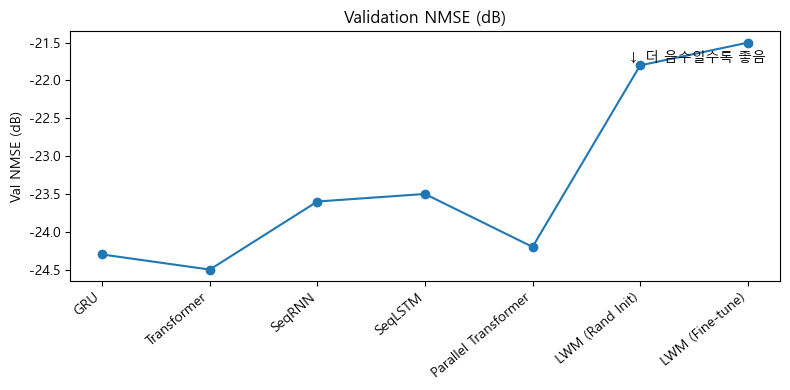

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 환경 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 기존 모델 결과
df_other = pd.DataFrame({
    'Configuration': ['GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer'],
    'Val RMSE':      [0.0303, 0.0295, 0.0330, 0.0335, 0.0305],
    'Val NMSE (dB)': [-24.3,  -24.5,  -23.6,  -23.5,  -24.2],
    'Training Time (s)': [374.10, 775.85, 260.23, 276.71, 705.98]
})

# LWM 실험 결과
df_lwm = pd.DataFrame([
    {'Configuration': 'LWM (Rand Init)', 'Val RMSE': 0.0339, 'Val NMSE (dB)': -21.8, 'Training Time (s)': 4118.97},
    {'Configuration': 'LWM (Fine-tune)',  'Val RMSE': 0.0361, 'Val NMSE (dB)': -21.5, 'Training Time (s)': 4206.82}
])

# 통합 데이터프레임
df_all = pd.concat([df_other, df_lwm], ignore_index=True)

# 꺾은선 그래프 그리기 (Val NMSE (dB))
plt.figure(figsize=(8, 4))
plt.plot(df_all['Configuration'], df_all['Val NMSE (dB)'], marker='o')
plt.title('Validation NMSE (dB)')
plt.ylabel('Val NMSE (dB)')
plt.xticks(rotation=40, ha='right')
plt.annotate('↓ 더 음수일수록 좋음',
             xy=(0.98, 0.92), xycoords='axes fraction',
             ha='right', va='top', fontsize=10)
plt.tight_layout()
plt.show()


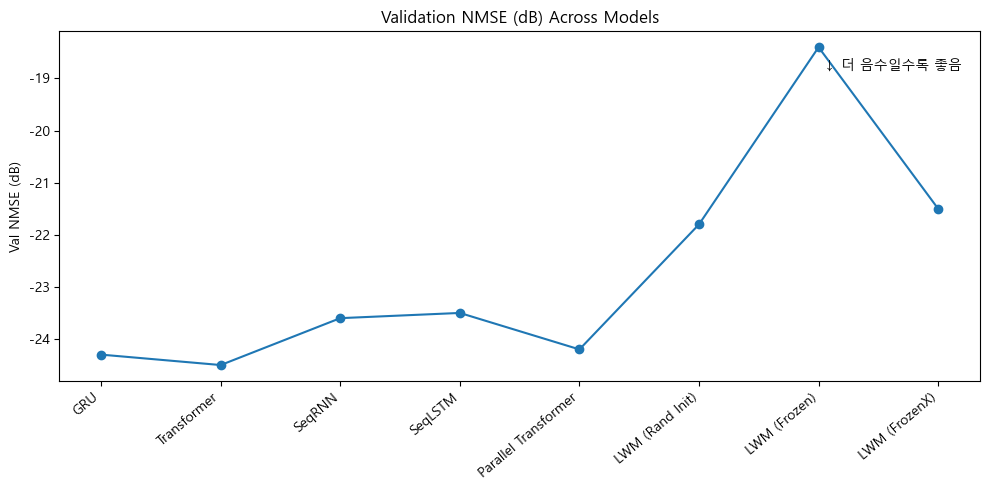

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 입력
df = pd.DataFrame({
    'Configuration': [
        'GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer',
        'LWM (Rand Init)', 'LWM (Frozen)', 'LWM (FrozenX)'
    ],
    'Val NMSE (dB)': [-24.3, -24.5, -23.6, -23.5, -24.2, -21.8, -18.4, -21.5]
})

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df['Configuration'], df['Val NMSE (dB)'], marker='o')
plt.title('Validation NMSE (dB) Across Models')
plt.ylabel('Val NMSE (dB)')
plt.xticks(rotation=40, ha='right')
plt.annotate('↓ 더 음수일수록 좋음',
             xy=(0.98, 0.92), xycoords='axes fraction',
             ha='right', va='top', fontsize=10)
plt.tight_layout()
plt.show()


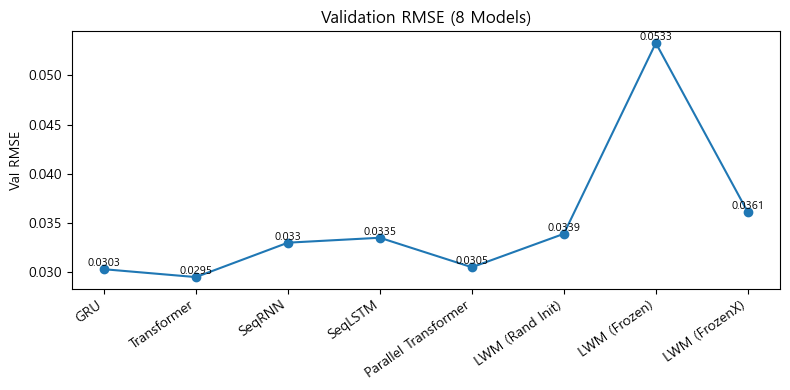

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) 기존 시퀀스 모델 5종 결과
# ---------------------------------------------------------
df_other = pd.DataFrame({
    'Configuration': ['GRU', 'Transformer', 'SeqRNN', 'SeqLSTM', 'Parallel Transformer'],
    'Val RMSE':      [0.0303, 0.0295, 0.0330, 0.0335, 0.0305],
    'Val NMSE (dB)': [-24.3,  -24.5,  -23.6,  -23.5,  -24.2],
    'Training Time (s)': [374.10, 775.85, 260.23, 276.71, 705.98]
})

# ---------------------------------------------------------
# 2) LWM 실험 3종 결과
# ---------------------------------------------------------
df_lwm = pd.DataFrame({
    'Configuration': ['LWM (Rand Init)', 'LWM (Frozen)', 'LWM (FrozenX)'],
    'Val RMSE':      [0.0339, 0.0533, 0.0361],
    'Val NMSE (dB)': [-21.8,  -18.4,  -21.5],
    'Training Time (s)':[4118.97, 3747.72, 4206.82]
})

# ---------------------------------------------------------
# 3) 통합
# ---------------------------------------------------------
df_all = pd.concat([df_other, df_lwm], ignore_index=True)

# ---------------------------------------------------------
# 4) 첫번째 그래프: Val RMSE 꺾은선 그래프
# ---------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(df_all['Configuration'], df_all['Val RMSE'], marker='o', linestyle='-')

# 값 라벨 표시
for i, v in enumerate(df_all['Val RMSE']):
    plt.text(i, v, f'{v:.4g}', ha='center', va='bottom', fontsize=8)

plt.title('Validation RMSE (8 Models)')
plt.ylabel('Val RMSE')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()
